In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('SkillCraft1_Dataset_2.csv')
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


Training size: X=(2500, 7), y=(2500,)
Validation size: X=(500, 7), y=(500,)
Test size: X=(300, 7), y=(300,)


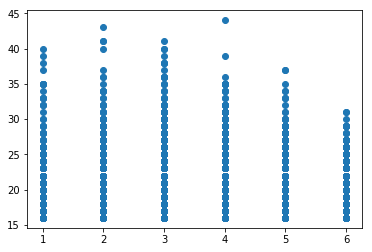

In [4]:
np_data = data.to_numpy(dtype=np.float32)
num_data, features = np_data.shape
relevant_data = np.zeros([num_data,7])
relevant_data[:,0]=np_data[:,2]
relevant_data[:,1]=np_data[:,3]
relevant_data[:,2]=np_data[:,5]
relevant_data[:,3]=np_data[:,6]
relevant_data[:,4]=np_data[:,11]
relevant_data[:,5]=np_data[:,12]
relevant_data[:,6]=np_data[:,13]

target_data = np_data[:,1]

Xtrain = relevant_data[0:2500, :]
ytrain = target_data[0:2500]

Xval = relevant_data[2500:3000, :]
yval = target_data[2500:3000]

Xtest = relevant_data[3000:3300, :]
ytest = target_data[3000:3300]

plt.scatter(np_data[:,1],relevant_data[:,0])

print("Training size: X={}, y={}".format(Xtrain.shape, ytrain.shape))
print("Validation size: X={}, y={}".format(Xval.shape, yval.shape))
print("Test size: X={}, y={}".format(Xtest.shape, ytest.shape))

In [5]:

def eval_perfomance(X, y, regressor):
  y_pred = regressor.predict(X)
  if len(y_pred.shape) > 1:
    y_pred = y_pred.flatten()
  diff = y - y_pred
  return np.sqrt(np.dot(diff,diff)/len(diff))

class MeanPredictor:
  def predict(self, X):
    return np.zeros(len(X))

from sklearn.linear_model import LinearRegression

mean_predictor = MeanPredictor() 

linear_model = LinearRegression()
linear_model.fit(Xtrain, ytrain)
print(linear_model.coef_)


[ 1.49221489e-02  6.88108214e-03  5.37966626e-03  2.58949201e+01
  1.89710165e+02 -1.19392771e-02 -2.24614620e-02]


In [6]:
linear_train_perf = eval_perfomance(Xtrain, ytrain, linear_model)
linear_val_perf = eval_perfomance(Xval, yval, linear_model)
mean_pred_train_perf = eval_perfomance(Xtrain, ytrain, mean_predictor)

print("Error Lineal: training= {}, val= {}".format(linear_train_perf, linear_val_perf))
print("Mean predictor error={}".format(mean_pred_train_perf))

print(Xtest[2])
target_prueba= linear_model.predict(Xtest[0:20,:])
print(target_prueba.astype(int))
print(ytest[0:20].astype(int))

Error Lineal: training= 1.016123017216146, val= 1.0227745302482234
Mean predictor error=4.310823587204654
[2.10000000e+01 1.60000000e+01 9.28056030e+01 8.63142428e-04
 3.56576871e-03 3.73704987e+01 5.33492012e+01]
[5 3 4 3 2 5 1 4 2 4 3 2 3 5 3 5 5 4 5 4]
[5 2 3 5 3 6 1 3 2 3 4 3 6 6 5 6 5 6 6 5]


## Realizaremos un algoritmo de Clustering K-means##

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6).fit(Xtrain)

In [8]:

target_prueba_kmeans = kmeans.predict(Xtest[0:20,:])
print("Predict Data:{}".format(target_prueba_kmeans.astype(int)+1))
print("Real Data:   {}".format(ytest[0:20].astype(int)))

kmeans_train_perf = eval_perfomance(Xtrain, ytrain, kmeans)
print("Error kmeans classificator: {}".format(kmeans_train_perf))


Predict Data:[3 2 2 2 4 6 4 2 5 3 5 4 2 3 2 3 6 2 6 3]
Real Data:   [5 2 3 5 3 6 1 3 2 3 4 3 6 6 5 6 5 6 6 5]
Error kmeans classificator: 2.619465594353169
